In [48]:
# Required libraries  
from utils import one_hot_encode, binarize_data, binarize_3d, plot_central_planes, plot_3d, create_dir
   
import os
import glob
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import cv2

In [49]:
datasets_base_path = '../03_CT_Scan_Images/' #path to directory with '.mat' datasets
datasets = glob.glob(datasets_base_path +'*.mat') #find all '.mat' datasets in the directory
dataset_names = [path.replace(datasets_base_path, '').replace('.mat', '') for path in datasets] #extract dataset name

In [32]:
path_to_save = './binarization_results/porosity_csv/' #save csv files to
create_dir(path_to_save)

for id_ in range(len(datasets)):
    print(dataset_names[id_] + ' dataset is chosen')
    rawMatData = loadmat(datasets[id_]) # load dataset with id_ = 0
    bwImage = rawMatData["bwImage"]

    print('Data shape: ', ctImage.shape, '\n')
    
    #estimate original porosity
    original_porosity = []
    for bw_img_orig in bwImage:
        original_porosity.append(np.sum(bw_img_orig==0)/np.prod(bw_img_orig.shape))
    #load predicted porosity
    pred_porosity = np.load('./binarization_results/npz/'+dataset_names[id_]+'_predicted_porosity.npz')['data']
    df = pd.DataFrame(list(zip(original_porosity, pred_porosity)), 
                   columns =['original', 'predicted']) 
    df.to_csv(path_to_save + dataset_names[id_] + '.csv', index = False)

Beta_2_0.2 dataset is chosen
Data shape:  (516, 516, 516) 

Beta_2_0.5 dataset is chosen
Data shape:  (516, 516, 516) 

Beta_1_0.2 dataset is chosen
Data shape:  (516, 516, 516) 

Beta_1_0.5 dataset is chosen
Data shape:  (516, 516, 516) 

Normal_2_0.2 dataset is chosen
Data shape:  (516, 516, 516) 

Mono_2_0 dataset is chosen
Data shape:  (516, 516, 516) 

Mono_2_0.5 dataset is chosen
Data shape:  (516, 516, 516) 

Beta_1_0 dataset is chosen
Data shape:  (516, 516, 516) 

Uniform_1_0.5 dataset is chosen
Data shape:  (516, 516, 516) 

Mono_3_0.2 dataset is chosen
Data shape:  (516, 516, 516) 

Normal_3_0.5 dataset is chosen
Data shape:  (516, 516, 516) 

Normal_3_0 dataset is chosen
Data shape:  (516, 516, 516) 

Mono_2_0.2 dataset is chosen
Data shape:  (516, 516, 516) 

Normal_2_0.5 dataset is chosen
Data shape:  (516, 516, 516) 

Normal_3_0.2 dataset is chosen
Data shape:  (516, 516, 516) 

Mono_3_0.5 dataset is chosen
Data shape:  (516, 516, 516) 

Uniform_1_0.2 dataset is chosen
D

## Check

In [38]:
#check one of the datasets
pd.read_csv(path_to_save + dataset_names[id_] + '.csv')

,original,predicted
0,0.338852,0.336490
1,0.325874,0.331842
2,0.315733,0.325693
3,0.307595,0.319093
4,0.301119,0.311347
...,...,...
520,0.319372,0.330434
521,0.324190,0.333838
522,0.328990,0.337705
523,0.334483,0.339316


In [46]:
#estimate original porosity
id_ = 0
rawMatData = loadmat(datasets[id_]) # load dataset with id_ = 0
bwImage = rawMatData["bwImage"]
original_porosity = []

for bw_img_orig in bwImage:
    original_porosity.append(np.sum(bw_img_orig==0)/np.prod(bw_img_orig.shape))
pred_porosity = np.load('./binarization_results/npz/'+dataset_names[id_]+'_predicted_porosity.npz')['data']

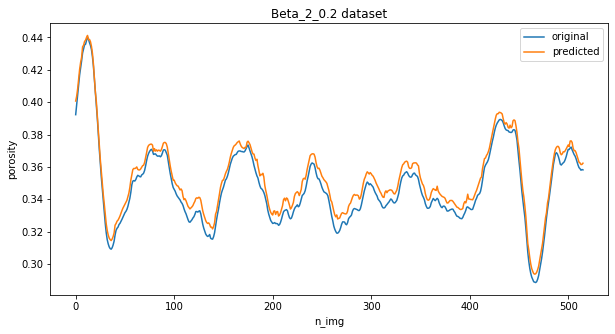

In [47]:
plt.figure(figsize = (10,5))
plt.title(dataset_names[id_] + ' dataset')
plt.plot(original_porosity, label = 'original')
plt.plot(pred_porosity, label = 'predicted')
plt.ylabel('porosity')
plt.xlabel('n_img')
plt.legend()
plt.show()